In [3]:
import pyvista as pv
import numpy as np


filename = 'mandel_uniform_flow_out/particles/PartFluid_0119.vtk'
mesh = pv.read(filename)

bound = pv.read('mandel_uniform_flow_out/mandel_uniform_flow_Bound.vtk')
all_ = pv.read('mandel_uniform_flow_out/mandel_uniform_flow_All.vtk')
fluids = pv.read('mandel_uniform_flow_out/mandel_uniform_flow_Fluid.vtk')
mkcells = pv.read('mandel_uniform_flow_out/mandel_uniform_flow_MkCells.vtk')
# note that we have 6 Data Arrays
mesh



PolyData (0x7f77680b3130)
  N Cells:	5060
  N Points:	5060
  X Bounds:	-1.050e+00, 1.050e+00
  Y Bounds:	-1.005e+00, 1.001e+00
  Z Bounds:	-1.015e+00, 1.064e+00
  N Arrays:	6

In [4]:
geom = pv.Arrow()  # This could be any dataset

# Perform the glyph
# mesh.set_active_scalar('Vel')


# mesh.set_active_vectors('Vel')
wid = .05
lr = -0.0

bounds = [-1,1 , -wid/2+lr,wid/2+lr , -1,1]
# mesh2 = mesh.gaussian_smooth(std_dev=2.)
clipped2 = mesh.clip_box(bounds,invert=False)

glyphs = clipped2.glyph(orient="Vel",scale="Vel-normed", factor=0.15, geom=geom)

# plot using the plotting class
pv.set_plot_theme("document")

p = pv.Plotter()
p.add_mesh(glyphs,lighting=True)
# Set a cool camera position
# p.camera_position = [
#     (84.58052237950857, 77.76332116787425, 27.208569926456548),
#     (131.39486171068918, 99.871379394528, 20.082859824932008),
#     (0.13483731007732908, 0.033663777790747404, 0.9902957385932576),
# # ]
p.show_grid()
p.show(cpos=[0,1,0])

RuntimeError: Data field (None) not useable

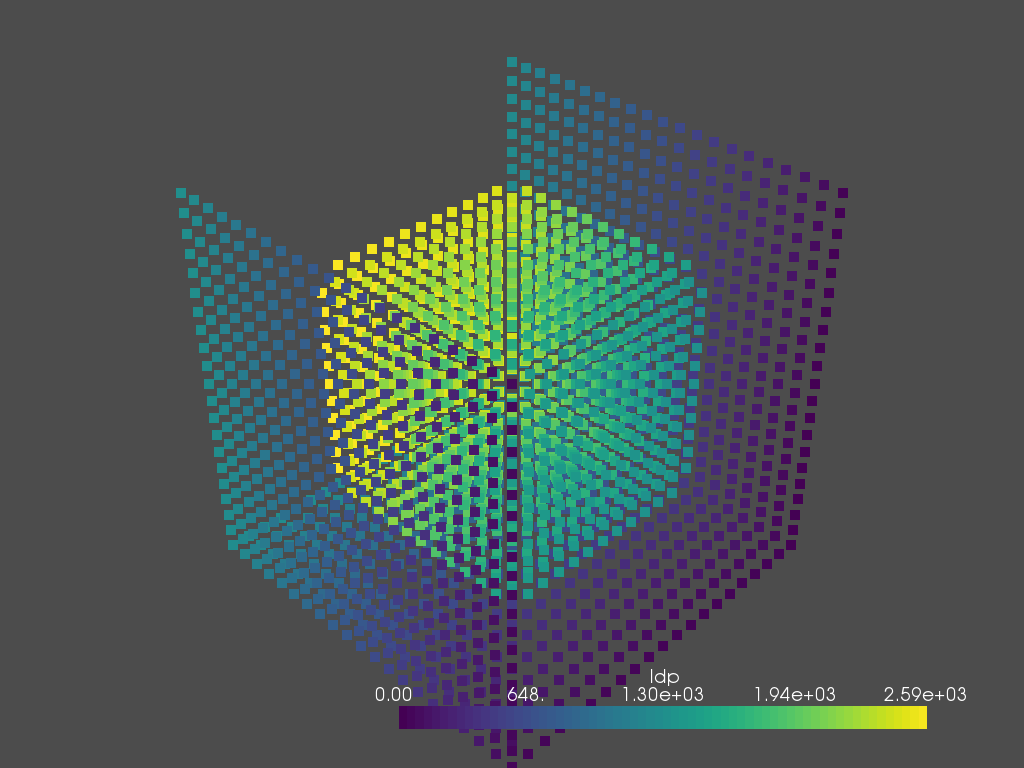

ERROR:root:The interactor must be set prior to enabling/disabling widget


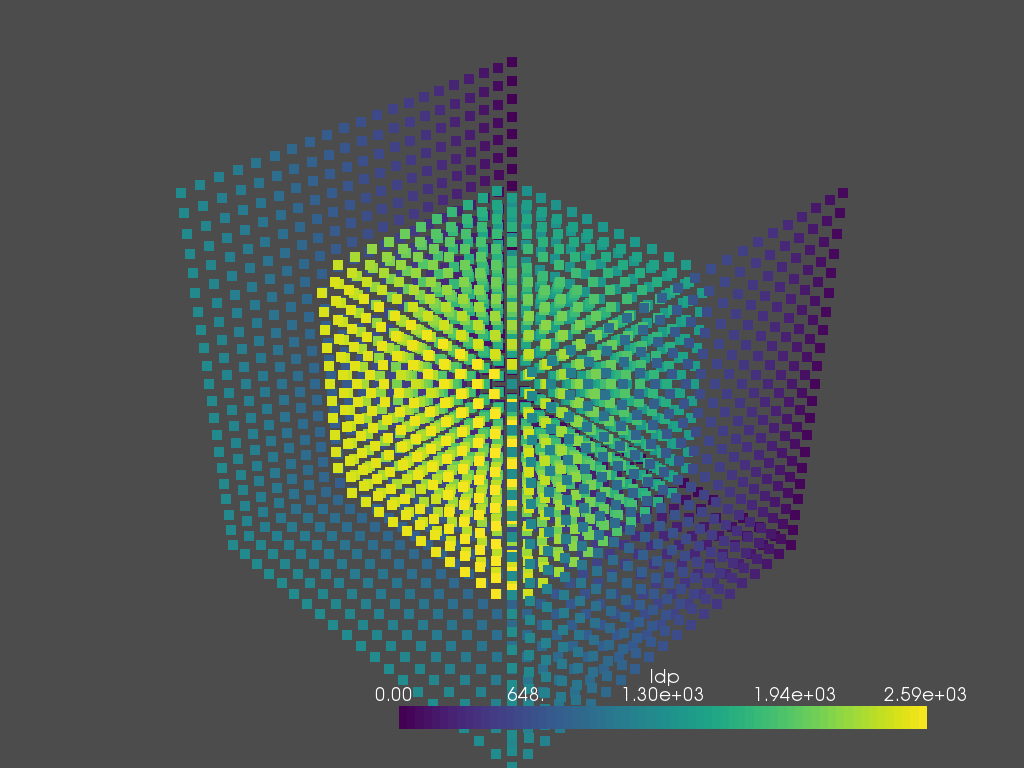

ERROR:root:The interactor must be set prior to enabling/disabling widget


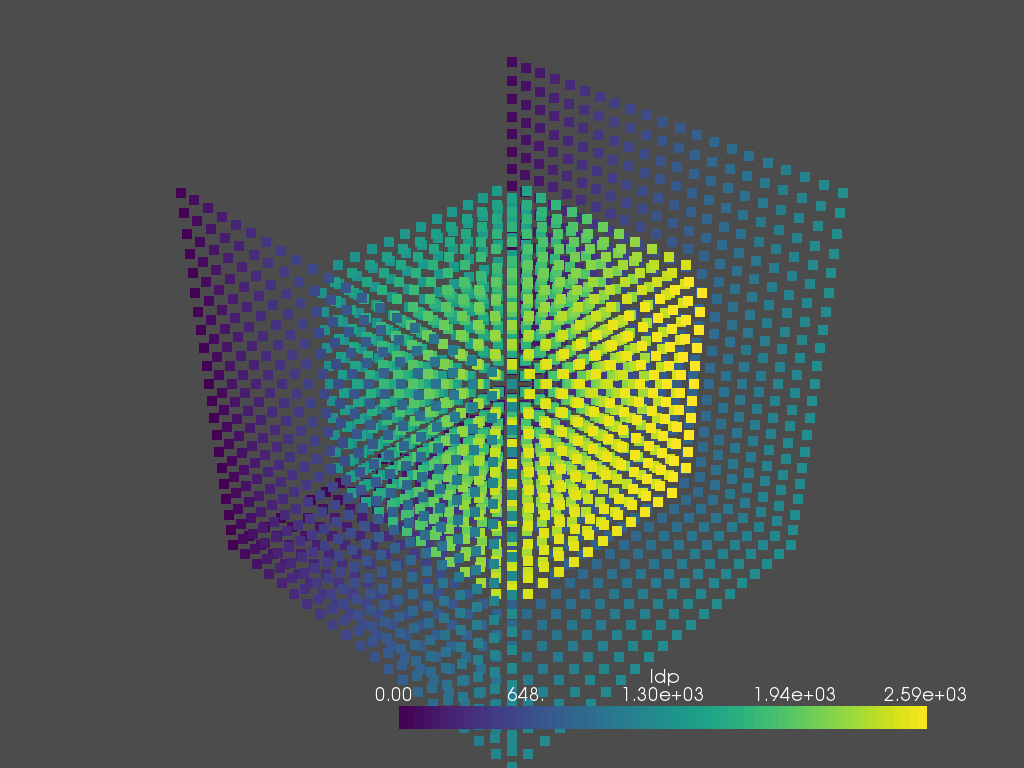

ERROR:root:The interactor must be set prior to enabling/disabling widget


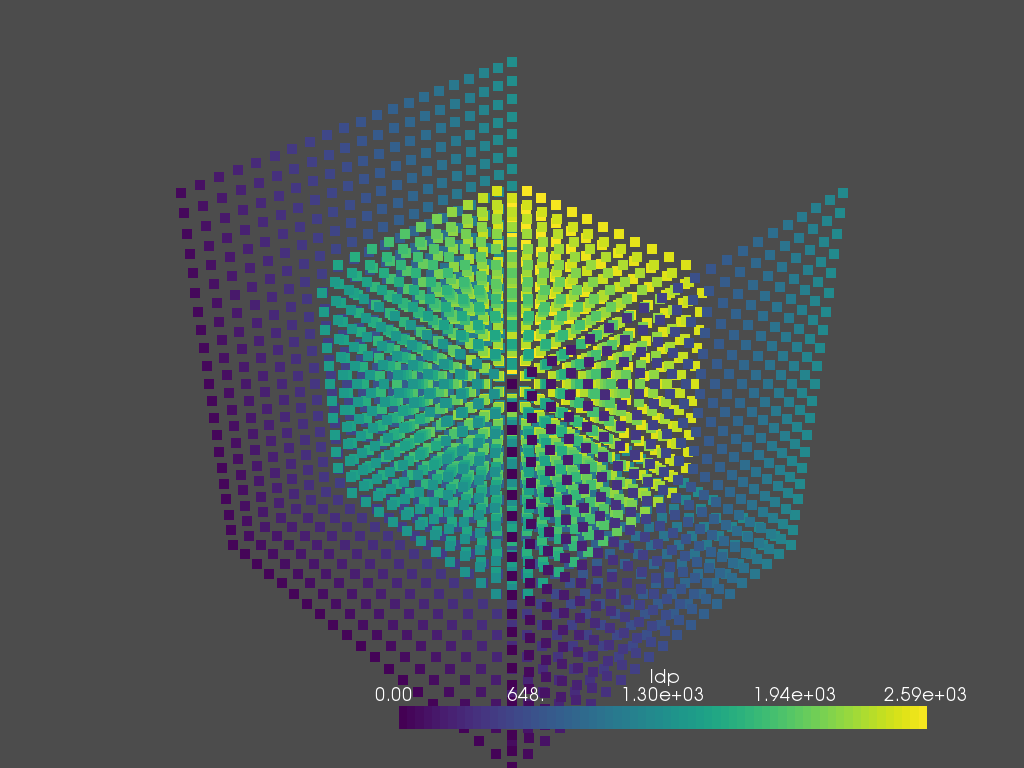

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [5]:
# mesh.set_active_scalars('Press')

bound.plot(point_size=10,cpos=[-1,1,1])
bound.plot(point_size=10,cpos=[1,1,1])
bound.plot(point_size=10,cpos=[1,-1,1])
bound.plot(point_size=10,cpos=[-1,-1,1])
# pv.show(cpos=[1,1,0])

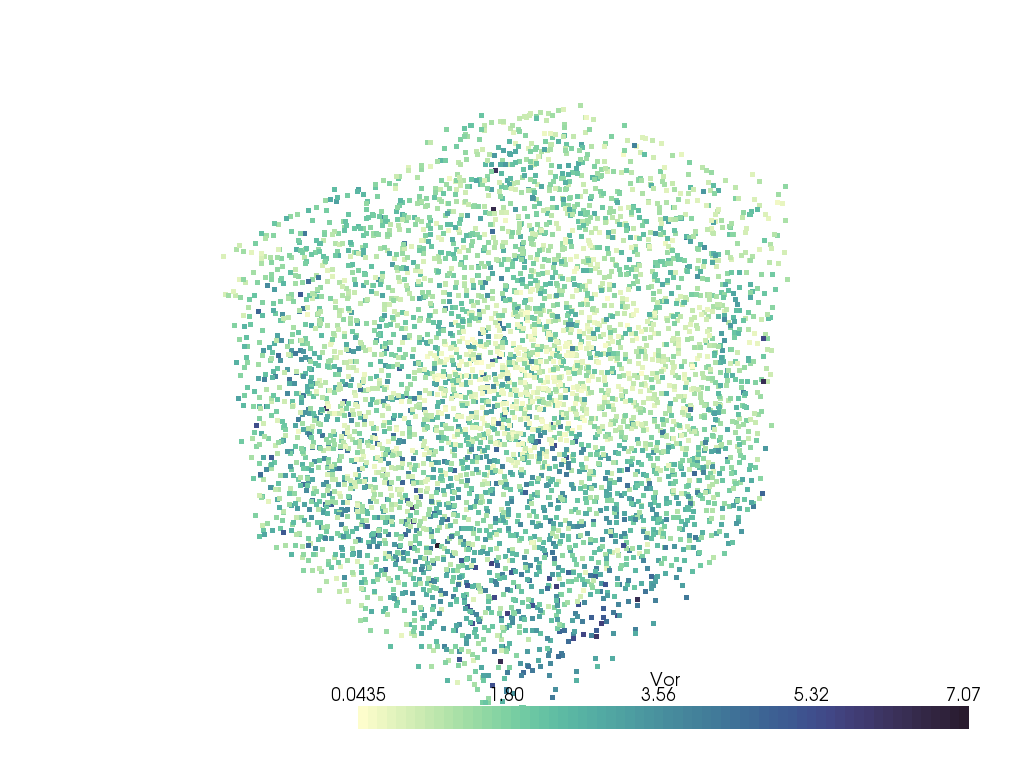

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [10]:
# mesh.plot(point_size=10)
import matplotlib.pyplot as plt
pv.set_plot_theme("document")

# pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_scalars('Vor')


boring_cmap = plt.cm.get_cmap("cmo.deep", 255)

mesh.plot(cmap=boring_cmap)



pl = pv.PlotterITK()

#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh)
# pl.show(True)

In [25]:
sized = mesh.compute_cell_sizes()
cell_volumes = sized.cell_arrays["Volume"]
volume = mesh.volume

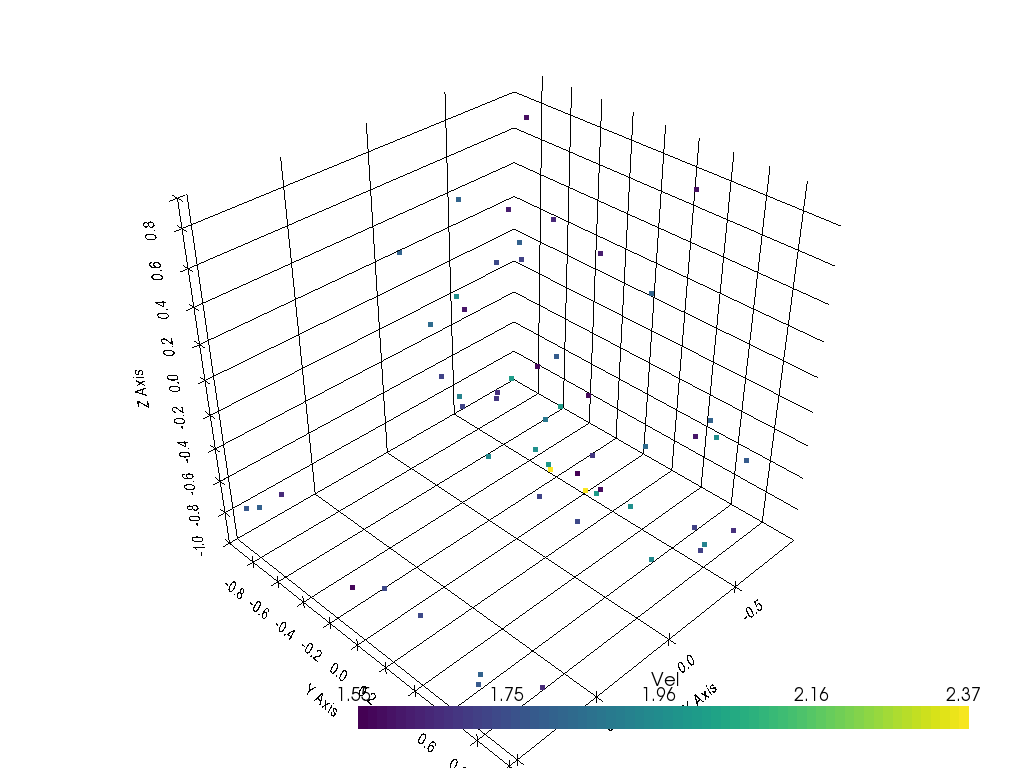

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [26]:
mesh.set_active_scalars('Vel')
threshed = mesh.threshold_percent([0.1, 0.765], invert=True)
threshed.set_active_scalars('Vel')
threshed.plot(show_grid=True, cpos=[1,1,1])

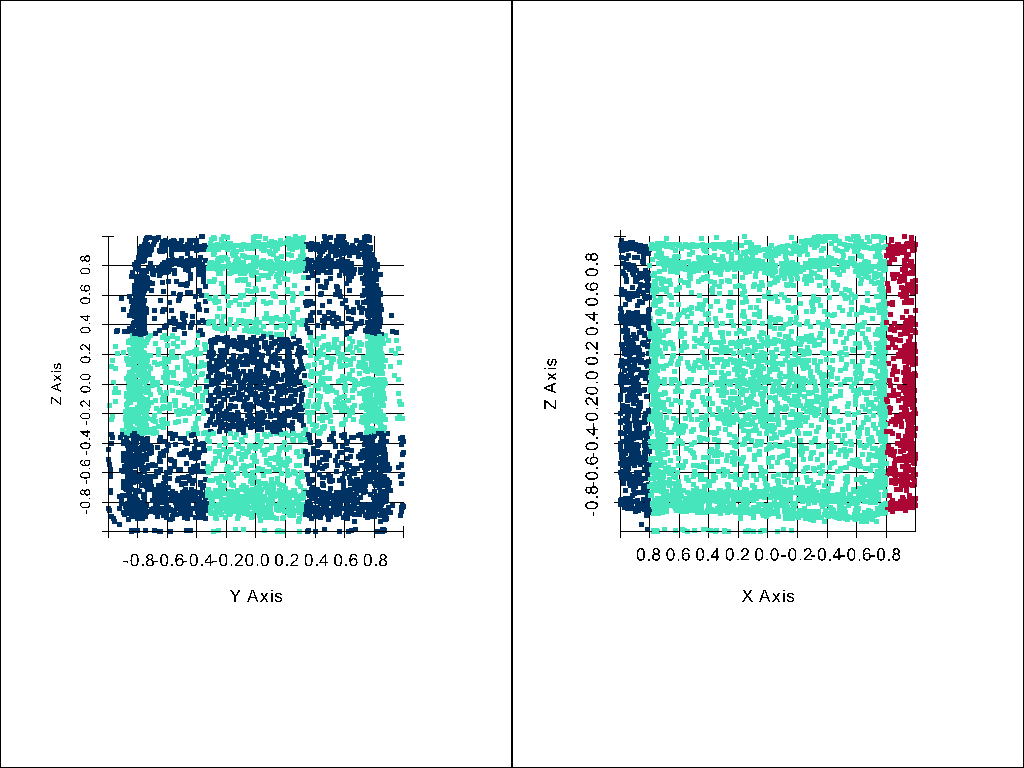

In [66]:
import cmocean
s_res = 3
p = pv.Plotter(shape=(1,2))
# p.add_mesh(mesh,color='blue', label='Input')
cmaps = cmocean.cm.algae
# print(cmaps.colors)
ii = 1
p.subplot(0,0)
for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii += 1
#         print(ii)
        colors = cmaps(ii*10)
#         print(colors)
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [-1,1 , z,z+2/s_res, y,y+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        if  ii % 2  == 1:
            p.add_mesh(clipped, label='Clipped',color='#47E5BC')
        else:
            p.add_mesh(clipped, label='Clipped',color='#003263')

p.camera_position = [1,0,0]
p.enable_parallel_projection()
p.show_grid()
# p.subplot(1,0)

ii = 1
p.subplot(0,1)
for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii = 0
#         print(ii)
        colors = cmaps(ii*10)
#         print(colors)
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
#         bounds = [-1,1 , z,z+2/s_res, y,y+2/s_res]
        bounds = [-1,-0.8 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        p.add_mesh(clipped, label='Clipped',color='#AB0634')
        
        bounds = [-0.8,0.8 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        p.add_mesh(clipped, label='Clipped',color='#47E5BC')

        bounds = [0.8,1 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        p.add_mesh(clipped, label='Clipped',color='#003263')

p.camera_position = [0,1,0]
p.enable_parallel_projection()
p.show_grid() 

p.save_graphic('particle_sensor_locations.tex', title='Sensor Locations', raster=True, painter=True)

# p.show()

p.show()

In [41]:
# make 64 sensors and compute some stuff
ii = 0

for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii +=1
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [0.8,1 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        print(ii,(clipped['Vel-normed']**2).mean(),clipped['Vel-normed'].std(),clipped['Vel-normed'].size)




1 1.0741658 0.35198042 75
2 0.5369921 0.31477037 70
3 0.8772188 0.3166732 62
4 0.6943451 0.36116904 75
5 0.15856804 0.147884 74
6 0.3544241 0.2629589 76
7 1.0850136 0.37363672 69
8 0.5381296 0.31790516 68
9 0.66740286 0.2636192 63


In [40]:

p = pv.Plotter()
p.add_mesh(bounds, label='Clipped',color='red')
# Set a cool camera position
# p.camera_position = [
#     (84.58052237950857, 77.76332116787425, 27.208569926456548),
#     (131.39486171068918, 99.871379394528, 20.082859824932008),
#     (0.13483731007732908, 0.033663777790747404, 0.9902957385932576),
# # ]
p.show_grid()
p.show(cpos=[0,1,0])

NotImplementedError: Type (<class 'list'>) not able to be wrapped into a PyVista mesh.

In [39]:
clipped['Vel'].mean(),clipped['Vel'].std(),clipped['Vel'].size

(0.26363373, 0.4819423, 1446)

In [38]:
# can't seem to get stream lines working
# https://docs.pyvista.org/examples/01-filter/streamlines.html#sphx-glr-examples-01-filter-streamlines-py
mesh.set_active_scalars("Vel-normed")
mesh.set_active_vectors("Vel")
streamlines, src = mesh.streamlines(
    return_source=True,
    max_time=100.0,
    initial_step_length=0.01,
    terminal_speed=0.1,
    n_points=50,
    source_radius=0.1,
    source_center=(0,0,0),
)
# p = pv.Plotter()
# p.add_mesh(src.tube(radius=0.01), scalars="Vel-normed", lighting=False)
# p.show()
streamlines
# src
# .,mnc1v56./9mnhvcxsc

PolyData (0x7f77524a24b0)
  N Cells:	0
  N Points:	0
  X Bounds:	1.000e+00, -1.000e+00
  Y Bounds:	1.000e+00, -1.000e+00
  Z Bounds:	1.000e+00, -1.000e+00
  N Arrays:	12

In [22]:
channels = mesh.threshold([1.5,4])
bodies = channels.split_bodies()
# Now remove all bodies with a small volume
for key in bodies.keys():
    b = bodies[key]
    vol = b.volume
#     if vol < 1000.0:
#         del bodies[key]
#         continue
    # Now lets add a volume array to all blocks
    b.cell_arrays["TOTAL VOLUME"] = np.full(b.n_cells, vol)

In [37]:
bodies.plot(scalars="TOTAL VOLUME", cmap="viridis", show_grid=True)


NameError: name 'bodies' is not defined

In [24]:

pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_vectors('Press')


pv.set_plot_theme("document")
pl = pv.PlotterITK()
# pl.set_background("royalblue", top="aliceblue")
#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh, scalar = mesh['Press'],smooth_shading=False)
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…